# Machine Learning em Python
Aula 03 - 04/08/2018

https://www.kaggle.com/uciml/pima-indians-diabetes-database/home
##### Contexto
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é diagnosticar se um paciente tem ou não diabetes, com base em determinadas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino, com pelo menos 21 anos de idade da herança indígena Pima.
##### Conteúdo
Os conjuntos de dados consistem em várias variáveis preditoras médicas e uma variável alvo. As variáveis preditoras incluem o número de gravidezes que o paciente teve, seu IMC, nível de insulina, idade e assim por diante.

- Pregnancies: número de vezes grávida.
- Glucose: concentração de glicose plasmática a 2 horas em teste oral de tolerância à glicose.
- BloodPressure: Pressão arterial diastólica (mm Hg)
- SkinThickness: espessura da dobra da pele do tríceps (milímetro)
- Insulina: insulina sérica de 2 horas (mu U / ml)
- BMI: índice de massa corporal (peso em kg / (altura em m) ^ 2)
- DiabetesPedigreeFunction
- Age: idade
- Outcome: classe (0 ou 1)

##### Objetivo
Criar um modelo de aprendizado de máquina para prever com precisão se os pacientes do conjunto de dados têm diabetes ou não.

#### Conhecendo seus dados
Antes de carregar os dados, é importante saber qual sua origem (banco, arquivo, internet, etc), conhecer sua estrutura, saber qual sua codificação, se possui cabeçalho, qual é seu separador, enfim, observe seu conjunto de dados antes de qualquer coisa.
- observe o tamanho do seu arquivo
- observe a codificação
- observe qual é o separador
- observe se há cabeçalho
- observe os tipos de variáveis existentes (isso vai exigir uma análise mais profunda posteriomente, mas já podemos ter uma rápida noção do dataset)
- os dados estão encapsulados com aspas

Foram mapeadas as seguintes informação:
- há cabeçalho
- é um arquivo pequeno, com menos de mil registros
- a vírgula é o separador
- sua codificação é UTF8
- as variáveis são do tipo numéricas
- não há encapsulamento das colunas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("tramitacoes.csv");df.head(5)

C:\Users\dfgonzaga\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NUANO,NUVOLUME,NUTRAMITE,FLTIPOPROCESSO,CDTIPOPARECER,CDMOTIVOTRAMI,FLPARECERASSINADO,FLTRAMIASSINADA,FLULTIMO,FLSITUACAO,FLSIGILOSO,FLPERMITERECUSA,FLBLOQUEIATRAMI,CDORGAOORIGEM,CDORGAOTRAMI
0,2012,1,1,F,NaN,NaN,N,N,S,E,N,S,0,NaN,7
1,2012,1,1,F,NaN,NaN,N,N,S,E,N,S,0,NaN,7
2,2012,1,1,F,NaN,NaN,N,N,S,E,N,S,0,NaN,7
3,2012,1,1,F,NaN,NaN,N,N,S,E,N,S,0,NaN,7
4,2012,1,1,F,NaN,NaN,N,N,S,E,N,S,0,NaN,7


#### Análise exploratória dos dados - estatística descritiva

In [3]:
df.shape

(311940, 15)

In [4]:
df.dtypes

NUANO                  int64
NUVOLUME               int64
NUTRAMITE              int64
FLTIPOPROCESSO        object
CDTIPOPARECER        float64
CDMOTIVOTRAMI        float64
FLPARECERASSINADO     object
FLTRAMIASSINADA       object
FLULTIMO              object
FLSITUACAO            object
FLSIGILOSO            object
FLPERMITERECUSA       object
FLBLOQUEIATRAMI        int64
CDORGAOORIGEM        float64
CDORGAOTRAMI           int64
dtype: object

In [5]:
df.describe()

,NUANO,NUVOLUME,NUTRAMITE,CDTIPOPARECER,CDMOTIVOTRAMI,FLBLOQUEIATRAMI,CDORGAOORIGEM,CDORGAOTRAMI
count,311940.000000,311940.000000,311940.000000,25821.000000,213.000000,311940.0,152026.000000,311940.000000
mean,2011.880807,0.520953,3.505001,3.972813,2.366197,0.0,699.908884,509.927675
std,5.138722,0.552775,25.811455,0.284298,1.040312,0.0,1555.534257,1078.093113
min,1997.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
25%,2009.000000,0.000000,1.000000,4.000000,2.000000,0.0,7.000000,7.000000
50%,2013.000000,1.000000,1.000000,4.000000,2.000000,0.0,27.000000,50.000000
75%,2016.000000,1.000000,3.000000,4.000000,2.000000,0.0,201.000000,201.000000
max,2018.000000,26.000000,2416.000000,4.000000,7.000000,0.0,6222.000000,6229.000000


In [7]:
#Observando se as classes estão balanceadas
df.groupby("CDORGAOTRAMI").size()

CDORGAOTRAMI
1         3514
2          529
3          155
4            1
7       132764
8           60
9            7
10        2035
17           1
27        4723
31           1
32          87
33         358
35         384
50       39803
51        1054
52         254
53        6239
59          93
60         251
61         135
62          81
83         268
84          16
86           2
87          15
90          39
92        8034
93       32544
124          1
         ...  
5955         5
5957         2
5961         5
5962         9
5968         3
5976        12
5984        32
5986        12
6001         2
6007         2
6015         1
6027       134
6029      1919
6062        23
6065        33
6074         4
6085         1
6089         4
6101       250
6103         1
6121         1
6139         2
6211       145
6214        11
6215         6
6216         1
6217         3
6221        27
6222         3
6229         3
Length: 386, dtype: int64

In [8]:
df.corr()

,NUANO,NUVOLUME,NUTRAMITE,CDTIPOPARECER,CDMOTIVOTRAMI,FLBLOQUEIATRAMI,CDORGAOORIGEM,CDORGAOTRAMI
NUANO,1.000000,-0.573828,0.047149,-0.057062,0.127477,NaN,0.201629,0.327389
NUVOLUME,-0.573828,1.000000,0.293617,0.098020,0.087626,NaN,0.024787,-0.179548
NUTRAMITE,0.047149,0.293617,1.000000,0.014188,-0.027232,NaN,0.038999,0.105597
CDTIPOPARECER,-0.057062,0.098020,0.014188,1.000000,-0.002210,NaN,-0.006731,-0.054098
CDMOTIVOTRAMI,0.127477,0.087626,-0.027232,-0.002210,1.000000,NaN,0.690573,-0.057708
FLBLOQUEIATRAMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDORGAOORIGEM,0.201629,0.024787,0.038999,-0.006731,0.690573,NaN,1.000000,-0.089522
CDORGAOTRAMI,0.327389,-0.179548,0.105597,-0.054098,-0.057708,NaN,-0.089522,1.000000


In [9]:
#saber se a distribuição é normal ou não:
# zero é simétrica
# positivo indica uma assimetria positiva 
# negativo indica uma assimetria negativa
df.skew()

NUANO              -1.078937
NUVOLUME            3.933834
NUTRAMITE          52.693331
CDTIPOPARECER     -10.361842
CDMOTIVOTRAMI       2.797626
FLBLOQUEIATRAMI     0.000000
CDORGAOORIGEM       2.650097
CDORGAOTRAMI        3.027946
dtype: float64

#### Análise exploratória dos dados - visualizando seus dados

In [10]:
import matplotlib as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C42DB87780>,
      dtype=object)

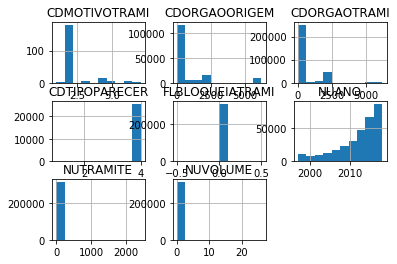

In [11]:
df.hist()

LinAlgError: singular matrix

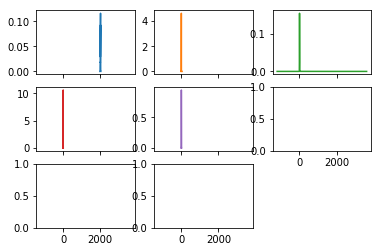

In [12]:
df.plot(kind = "density",subplots = True,layout = (3,3))

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df)

In [ ]:
sns.boxplot(data = df, orient ="h")

In [ ]:
from scipy import stats
sns.distplot(df.Age, fit = stats.norm);

### Pré-processamento dos dados

##### Normalizar os dados (colocar eles na mesma escala)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #pode usar também a função normalize

In [ ]:
#separando a classe do dataset:
dados = df.values
df_dados = dados[:,0:8]
df_classe = dados[:,8]
#criando a nova escala:
scaler = MinMaxScaler(feature_range= (0,1))
df_dados_norm = scaler.fit_transform(df_dados) 

##### Padronizar os dados (transformar dados com diferentes médias e desvios padrão em uma distribuição normal de média 0 e desvio padrão 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_dados)
df_dados_padr = scaler.transform(df_dados) 

In [ ]:
df["idade_disc"] = pd.cut(df.Age,bins = 3, labels=(["a","b","c"]));df.head(10)

In [ ]:
df.columns

In [ ]:
df.drop('idade_disc',axis=1);df.head(5)

In [ ]:
df_proc = pd.DataFrame(df_dados_norm);df_proc.head(5)

##### Redução da dimensionalidade
Vamos explorar a técnica mais famosa de redução de dimensões, o PCA (Principal Component Analysis). 
Esse método tem sua matemática baseada na transformação ortogonal linear, que busca dados que estão correlacionados, e realoca o eixo principal daquelas duas dimensões para aquela direção. 
- Extrair apenas as informações mais relevantes de um conjunto de dados;
- Comprimir o tamanho do conjunto de dados original, simplificando assim sua descrição;
- Permitir a análise da estrutura dos objetos e dos atributos de um conjunto de dados.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_proc.values)


In [ ]:
pca.explained_variance_ratio_

In [ ]:
df_pca

##### Seleção de variáveis (Feature Selection)
O Scikit Learning possui funções que facilitam a seleção das variáveis relevantes para a modelagem dos dados.

In [12]:
#Seleção univariada:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

df_classe = df_classe.astype('int')

df_label = pd.DataFrame(df_classe)
test = SelectKBest(score_func= chi2, k = 4 )
fit = test.fit(df_dados_norm,df_classe)

NameError: name 'df_classe' is not defined

In [ ]:
print(fit.scores_)

In [ ]:
selecionadas = fit.transform(df_dados_norm);selecionadas.shape

In [ ]:
# Eliminação Recursiva de Atributos
# Utiliza a acurácia para selecionar quais variáveis ajudam mais a saída do modelo 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df.values

# Separando o array em componentes de input e output
x = array[:,0:8]
y = array[:,8]
y = y.astype('int')

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(x, y)

# Print dos resultados
print("Número de Atributos: %d" % fit.n_features_)
print(df.columns[0:8])
print("Atributos Selecionados: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)




In [15]:
# Método Ensemble para Seleção de Variáveis
# Bagged Decision Trees, como o algoritmo RandomForest, podem ser usados para estimar a importância de cada atributo. 
#Esse método retorna um score para cada atributo.
from sklearn.ensemble import ExtraTreesClassifier

array = df.values

# Separando o array em componentes de input e output
x = array[:,0:8]
y = array[:,8]
y = y.astype('int')

# Criação do modelo
modelo = ExtraTreesClassifier()
modelo.fit(x,y)

# Print dos resultados
print(df.columns[0:8])
print(modelo.feature_importances_)




Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[0.10799897 0.23992633 0.10349419 0.0773655  0.07841165 0.13730299
 0.11415194 0.14134842]


### Avaliando modelos de classificação: 

#### Dataset de treino e Dataset de teste
Há alguns métodos de validar a qualidade do seu modelo, vamos conhecer o método que divide o conjunto em dois datasets: treino e teste.


In [14]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# Score
result = modelo.score(x_teste, y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 76.190%


#### Criando uma matriz de confusão:



In [13]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print(mat)

[[130  17]
 [ 38  46]]


### Avaliando modelos de regressão: 
Vamos usar o dataset da NASA: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

Método: Erro absoluto das médias (MAE - mean absolute error)  

In [11]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

# Carregando os dados
df = read_csv("airfoil_self_noise.csv")
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:4]
Y = array[:,5]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)


# Criando o modelo
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))

# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))

MAE: 0.1643235982889679
Variância: 0.28988730739410296


## Algoritmos de Classificação:
Voltamos ao dataset Pima para a classificação

#### Regressão Logística:

In [60]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[135  18]
 [ 29  47]]

Acurácia: 79.47598253275109%


array([1., 0., 1., 0., 1.])

#### KNN:

In [59]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = KNeighborsClassifier()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[116  37]
 [ 30  46]]

Acurácia: 70.74235807860262%


array([0., 0., 1., 0., 0.])

#### SVM:

In [58]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = SVC()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[153   0]
 [ 76   0]]

Acurácia: 66.8122270742358%


array([0., 0., 0., 0., 0.])

#### Naive Bayes

In [57]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[127  26]
 [ 30  46]]

Acurácia: 75.54585152838428%


array([1., 0., 1., 0., 1.])

#### Árvore de decisão

In [56]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[109  44]
 [ 31  45]]

Acurácia: 67.24890829694323%


array([1., 0., 1., 0., 1.])

#### Random Forest

In [55]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo

num_arvores = 50
max_features = 8
modelo = RandomForestClassifier(n_estimators=num_arvores,max_features=max_features)
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

data = read_csv("diabetes_new.csv")

modelo.predict(data)


Matriz de confusão: 
[[127  26]
 [ 29  47]]

Acurácia: 75.9825327510917%


array([1., 0., 1., 0., 1.])

## Algoritmos de Regressão:

#### Regressão Linear

In [5]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

# Carregando os dados
df = read_csv("airfoil_self_noise.csv")
array = df.values

# Separando o array em componentes de input e output
x = array[:,0:4]
y = array[:,5]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)


# Criando o modelo
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))

# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))

MAE: 24.523540981566967
Variância: 0.49931253015382704


#### Ridge:

In [4]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import Ridge

# Carregando os dados
df = read_csv("airfoil_self_noise.csv")
array = df.values

# Separando o array em componentes de input e output
x = array[:,0:4]
y = array[:,5]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)


# Criando o modelo
modelo = Ridge()
modelo.fit(x_treino,y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))

# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))

MAE: 24.623606039269355
Variância: 0.49726954131307693


#### KNN:

In [17]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

# Carregando os dados
df = read_csv("airfoil_self_noise.csv")
array = df.values

# Separando o array em componentes de input e output
x = array[:,0:4]
y = array[:,5]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)


# Criando o modelo
modelo = KNeighborsRegressor()
modelo.fit(x_treino,y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))

# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))

MAE: 37.47792402634149
Variância: 0.23482799772102836


#### SVM:

In [54]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.svm import SVR

# Carregando os dados
df = read_csv("airfoil_self_noise.csv")
array = df.values

# Separando o array em componentes de input e output
x = array[:,0:4]
y = array[:,5]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)


# Criando o modelo
modelo = SVR()
modelo.fit(x_treino,y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))

# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))





MAE: 45.408854035757486
Variância: 0.07290532583093279


#### Árvore de decisão

In [52]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

# MAE
from numpy import mean
print("MAE: "+str(mean((modelo.predict(x_teste) - y_teste)**2)))
# Variância
print("Variância: "+str(modelo.score(x_teste,y_teste)))


data = read_csv("diabetes_new.csv")

modelo.predict(data)


MAE: 0.33624454148471616
Variância: -0.5164258685930512


array([1., 0., 0., 0., 1.])

## Algoritmo de clusterização

array([1, 1, 1, 1, 0])

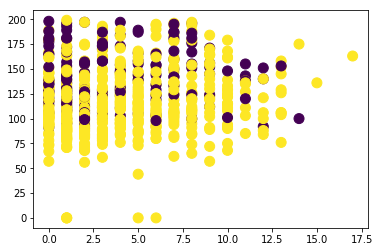

In [68]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.cluster import KMeans

# Carregar os dados:
df = read_csv("diabetes.csv")
array = df.values

# Separar array em componentes de input e output:
x = array[:,0:8]
y = array[:,8]


# Criação do modelo
modelo = KMeans(n_clusters = 2)
modelo.fit(x)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x[:, 0], x[:,1], s = 100, c = modelo.labels_)

data = read_csv("diabetes_new.csv")

modelo.predict(data)
